In [67]:
import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.california_housing.load_data(
    version="large", path="california_housing.npz", test_split=0.2, seed=113
)

In [68]:
x_train

array([[-118.27  ,   34.09  ,   52.    , ..., 1048.    ,  491.    ,
           3.7847],
       [-118.36  ,   33.96  ,   21.    , ..., 1286.    ,  557.    ,
           2.7284],
       [-122.39  ,   37.76  ,   52.    , ...,  712.    ,  398.    ,
           3.9722],
       ...,
       [-122.34  ,   37.57  ,   52.    , ...,  876.    ,  359.    ,
           8.2598],
       [-122.18  ,   37.89  ,   18.    , ..., 1634.    ,  734.    ,
           8.1489],
       [-118.43  ,   34.2   ,   29.    , ..., 1942.    ,  679.    ,
           3.1118]], shape=(16512, 8), dtype=float32)

In [69]:
# AveRooms
x_train = x_train[:, 2]
x_test = x_test[:, 2]

In [70]:
normalizer = keras.layers.BatchNormalization(axis=-1)

model = keras.Sequential(
    [
        keras.layers.Input(shape=(1,)),
        normalizer,
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dense(16, activation="relu"),
        keras.layers.Dense(8, activation="relu"),
        keras.layers.Dense(1, activation="linear"),
    ]
)

model.compile(
    optimizer=keras.optimizers.Adam(),
    loss = keras.losses.mean_absolute_percentage_error,
    metrics=[keras.metrics.mean_absolute_error]
)

history = model.fit(x_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 99.8893 - mean_absolute_error: 206399.8906 - val_loss: 99.3787 - val_mean_absolute_error: 206768.3594
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 94.8169 - mean_absolute_error: 198625.8594 - val_loss: 84.9715 - val_mean_absolute_error: 184594.1875
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 68.5900 - mean_absolute_error: 153579.5312 - val_loss: 58.7251 - val_mean_absolute_error: 131084.5312
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 54.3694 - mean_absolute_error: 120866.6797 - val_loss: 53.0930 - val_mean_absolute_error: 115627.5312
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 51.4846 - mean_absolute_error: 113855.7891 - val_loss: 51.5524 - val_mean_absolute_error: 113596.8047
Epoch 6/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 49.7598 - mean_absolute_error: 111135.9609 - val_loss: 50.3796 - val_mean_absolute_error: 111077.6250
Epoch 7/20
413/413 ━━━━━━━━━

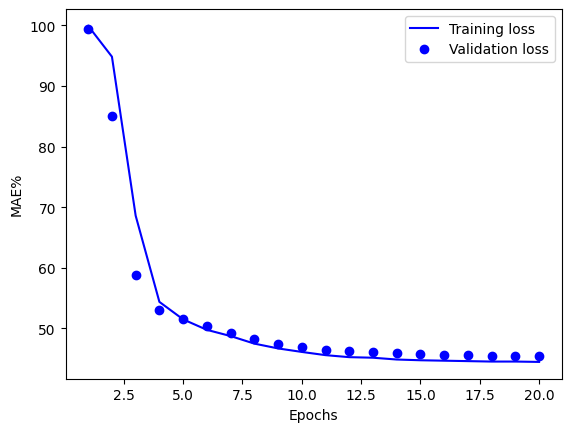

In [71]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "b", label="Training loss")
plt.plot(epochs, val_loss, "bo", label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("MAE%")
plt.legend()
plt.show()

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


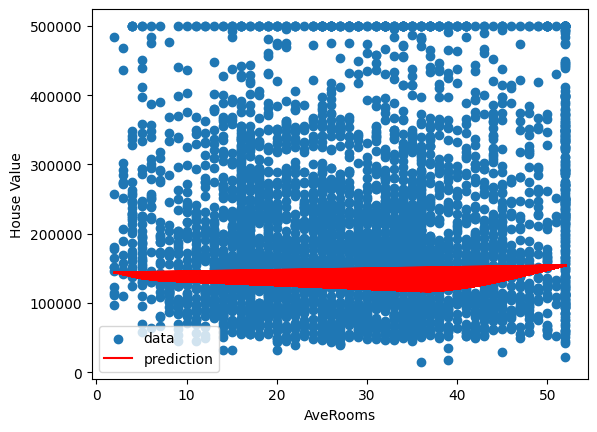

In [72]:
y_pred = model.predict(x_test)

plt.scatter(x_test, y_test, label="data")
plt.plot(x_test, y_pred, color="red", label="prediction")
plt.xlabel("AveRooms")
plt.ylabel("House Value")

plt.legend()
plt.show()